In [ ]:
#experiment 1 - n queens
def isSafe(board, row, col, N):
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, N), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

def solveNQueens(board, col, N):
    # If all queens are placed, return True
    if col >= N:
        return True

    # Consider this column and try placing the queen in all rows one by one
    for i in range(N):
        if isSafe(board, i, col, N):
            # Place the queen
            board[i][col] = 1

            # Recur to place the rest of the queens
            if solveNQueens(board, col + 1, N):
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, backtrack
            board[i][col] = 0

    return False

def printSolution(board, N):
    for i in range(N):
        for j in range(N):
            if board[i][j] == 1:
                print("Q", end=" ")
            else:
                print(".", end=" ")
        print()
    print("\n")

def solveNQueensProblem(N):
    board = [[0 for _ in range(N)] for _ in range(N)]

    if not solveNQueens(board, 0, N):
        print("Solution does not exist")
        return False

    printSolution(board, N)
    return True

# Main code
if __name__ == "__main__":
    N = int(input("Enter the value of N (4, 6, 8, etc.): "))
    solveNQueensProblem(N)



Enter the value of N (4, 6, 8, etc.): 4
. . Q . 
Q . . . 
. . . Q 
. Q . . 




In [ ]:
# experiment 2 - dfs
# Recursive DFS implementation
def DFS(graph, node, visited):
    if node not in visited:
        print(node, end=' ')
        visited.add(node)
        for neighbor in graph[node]:
            DFS(graph, neighbor, visited)

# Main code
if __name__ == "__main__":
    # Input number of nodes and edges
    nodes = int(input("Enter the number of nodes: "))
    edges = int(input("Enter the number of edges: "))

    # Initialize the graph as a dictionary
    graph = {i: [] for i in range(nodes)}

    # Input the edges
    print("Enter the edges (node1 node2):")
    for _ in range(edges):
        u, v = map(int, input().split())
        graph[u].append(v)
        graph[v].append(u)  # Assuming undirected graph

    # Input the starting node
    start_node = int(input("Enter the starting node: "))

    # Call DFS
    print("DFS Traversal starting from node", start_node, ":")
    visited = set()
    DFS(graph, start_node, visited)



Enter the number of nodes: 6
Enter the number of edges: 7
Enter the edges (node1 node2):
0 1
0 2
1 3
1 4
2 4
3 5
4 5
Enter the starting node: 0
DFS Traversal starting from node 0 :
0 1 3 5 4 2 

In [ ]:
# experiment 3 - water jug
def is_valid_state(x, y):
    # Ensure that the state is within the capacity of the jugs
    return 0 <= x <= 4 and 0 <= y <= 3

def dfs(x, y, visited, path):
    if (x, y) in visited:
        return False

    # Mark the current state as visited
    visited.add((x, y))

    # Store the current state in the path
    path.append((x, y))

    # If we have 2 liters in the 4-liter jug and 0 liters in the 3-liter jug, the problem is solved
    if x == 2 and y == 0:
        return True

    # Possible moves
    possible_moves = [
        (4, y),  # Fill the 4-liter jug
        (x, 3),  # Fill the 3-liter jug
        (0, y),  # Empty the 4-liter jug
        (x, 0),  # Empty the 3-liter jug
        (x - min(x, 3 - y), y + min(x, 3 - y)),  # Pour from 4L to 3L
        (x + min(y, 4 - x), y - min(y, 4 - x))   # Pour from 3L to 4L
    ]

    # Explore all possible moves using DFS
    for (next_x, next_y) in possible_moves:
        if is_valid_state(next_x, next_y) and dfs(next_x, next_y, visited, path):
            return True

    # Backtrack: remove the last state if it leads to no solution
    path.pop()
    return False

def solve_water_jug_problem():
    # Initialize the starting state
    initial_state = (0, 0)

    # To keep track of visited states
    visited = set()

    # To store the path to the solution
    path = []

    if dfs(initial_state[0], initial_state[1], visited, path):
        print("Solution found!")
        for step in path:
            print(step)
    else:
        print("No solution exists.")

# Main code
if __name__ == "__main__":
    solve_water_jug_problem()



Solution found!
(0, 0)
(4, 0)
(4, 3)
(0, 3)
(3, 0)
(3, 3)
(4, 2)
(0, 2)
(2, 0)


In [ ]:
# experiment 4 - a star informed search
import heapq

def a_star(graph, start, goal, h):
    # Priority queue to store (f, node)
    open_set = []
    heapq.heappush(open_set, (h[start], start))

    # Store the cost from start to each node
    g = {node: float('inf') for node in graph}
    g[start] = 0

    # Store the estimated total cost from start to goal through each node
    f = {node: float('inf') for node in graph}
    f[start] = h[start]

    # Track the path
    came_from = {}

    # Closed set to track visited nodes
    closed_set = set()

    while open_set:
        # Pop the node with the lowest f value
        _, current = heapq.heappop(open_set)

        # If the goal is reached, reconstruct the path
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path

        closed_set.add(current)

        # Explore neighbors
        for neighbor, cost in graph[current]:
            if neighbor in closed_set:
                continue

            tentative_g = g[current] + cost

            if tentative_g < g[neighbor]:
                came_from[neighbor] = current
                g[neighbor] = tentative_g
                f[neighbor] = g[neighbor] + h[neighbor]
                if neighbor not in open_set:
                    heapq.heappush(open_set, (f[neighbor], neighbor))

    return None  # If no path found

# Example usage

# Define the graph as an adjacency list
graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('A', 1), ('D', 1), ('E', 5)],
    'C': [('A', 3), ('F', 2)],
    'D': [('B', 1)],
    'E': [('B', 5), ('F', 2)],
    'F': [('C', 2), ('E', 2), ('G', 1)],
    'G': [('F', 1)]
}

# Define the heuristic function (straight-line distance to goal, G)
heuristic = {
    'A': 7,
    'B': 6,
    'C': 2,
    'D': 5,
    'E': 3,
    'F': 1,
    'G': 0  # Goal
}

# Call A* algorithm
start_node = 'A'
goal_node = 'G'
path = a_star(graph, start_node, goal_node, heuristic)

# Output the result
if path:
    print("Path found:", path)
else:
    print("No path found")



Path found: ['A', 'C', 'F', 'G']


In [ ]:
#Experiment 5 - Minimax
# A simple Python3 program to find
# maximum score that
# maximizing player can get
import math

def minimax (curDepth, nodeIndex,
			maxTurn, scores,
			targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth):
		return scores[nodeIndex]

	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2,
					False, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					False, scores, targetDepth))

	else:
		return min(minimax(curDepth + 1, nodeIndex * 2,
					True, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					True, scores, targetDepth))

# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

# This code is contributed
# by rootshadow


The optimal value is : 12


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 6.9 MB/s eta 0:00:00


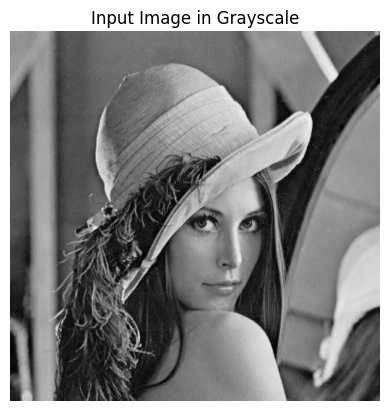

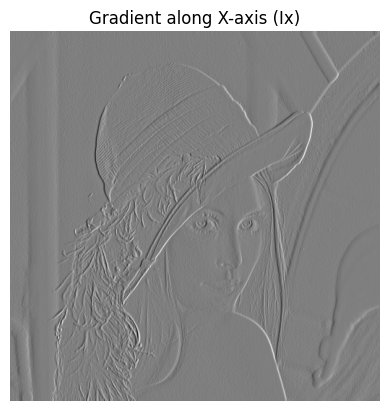

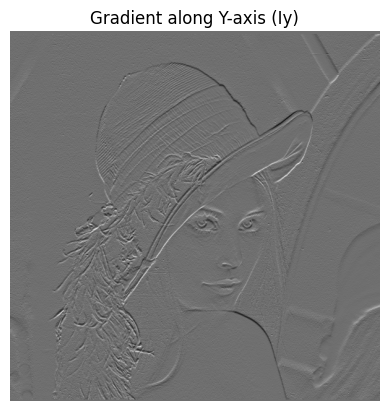

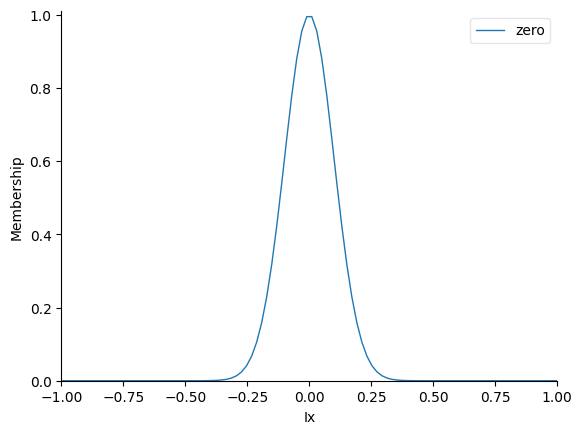

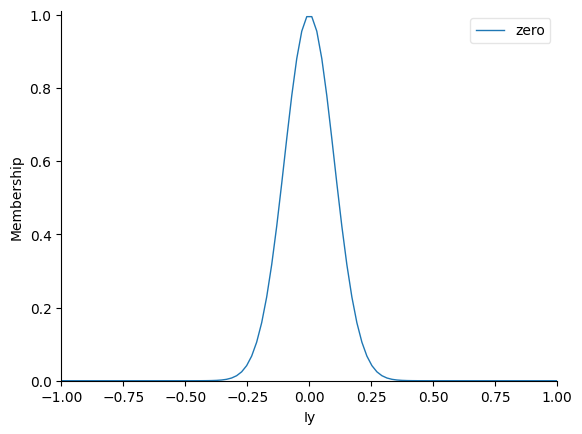

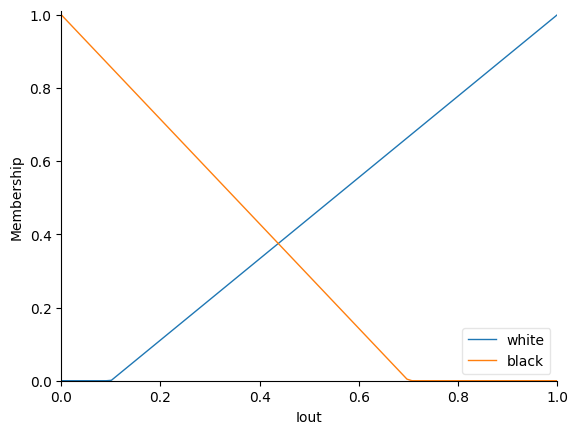

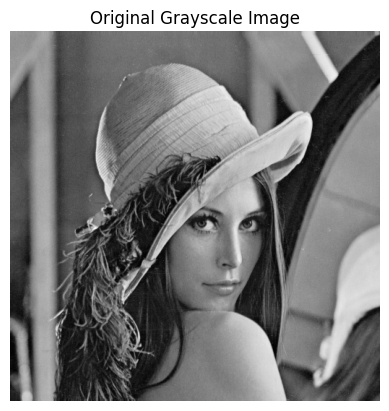

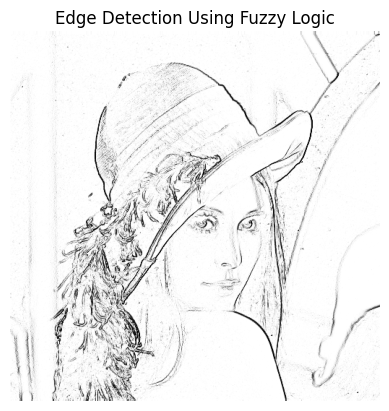

In [ ]:
# fuzzy logic - image processing
!pip install scikit-image scikit-fuzzy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.ndimage import convolve
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load an example image
image_rgb = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')

# Convert to grayscale
image_gray = color.rgb2gray(image_rgb)
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Input Image in Grayscale')
plt.axis('off')
plt.show()

image_double = img_as_float(image_gray)

# Define gradient filters
Gx = np.array([[-1, 1]])
Gy = np.array([[-1], [1]])

# Convolve to get gradients
Ix = convolve(image_double, Gx, mode='reflect')
Iy = convolve(image_double, Gy, mode='reflect')

# Display gradients
plt.figure()
plt.imshow(Ix, cmap='gray')
plt.title('Gradient along X-axis (Ix)')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(Iy, cmap='gray')
plt.title('Gradient along Y-axis (Iy)')
plt.axis('off')
plt.show()

# Create fuzzy variables
Ix_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Ix')
Iy_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Iy')
Iout_fuzzy = ctrl.Consequent(np.linspace(0, 1, 100), 'Iout')

# Define membership functions
Ix_fuzzy['zero'] = fuzz.gaussmf(Ix_fuzzy.universe, 0, 0.1)
Iy_fuzzy['zero'] = fuzz.gaussmf(Iy_fuzzy.universe, 0, 0.1)
Iout_fuzzy['white'] = fuzz.trimf(Iout_fuzzy.universe, [0.1, 1, 1])
Iout_fuzzy['black'] = fuzz.trimf(Iout_fuzzy.universe, [0, 0, 0.7])

# Plot membership functions
Ix_fuzzy.view()
Iy_fuzzy.view()
Iout_fuzzy.view()

rule1 = ctrl.Rule(Ix_fuzzy['zero'] & Iy_fuzzy['zero'], Iout_fuzzy['white'])
rule2 = ctrl.Rule(~(Ix_fuzzy['zero'] & Iy_fuzzy['zero']), Iout_fuzzy['black'])

# Create control system
edge_detection_ctrl = ctrl.ControlSystem([rule1, rule2])
edge_detection = ctrl.ControlSystemSimulation(edge_detection_ctrl)

edge_image = np.zeros_like(image_double)
for i in range(Ix.shape[0]):
    for j in range(Ix.shape[1]):
        edge_detection.input['Ix'] = Ix[i, j]
        edge_detection.input['Iy'] = Iy[i, j]
        edge_detection.compute()
        edge_image[i, j] = edge_detection.output['Iout']

# Display original and edge-detected images
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detection Using Fuzzy Logic')
plt.axis('off')
plt.show()


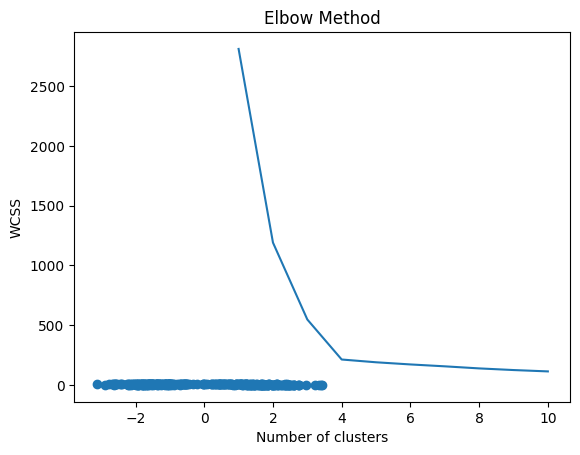

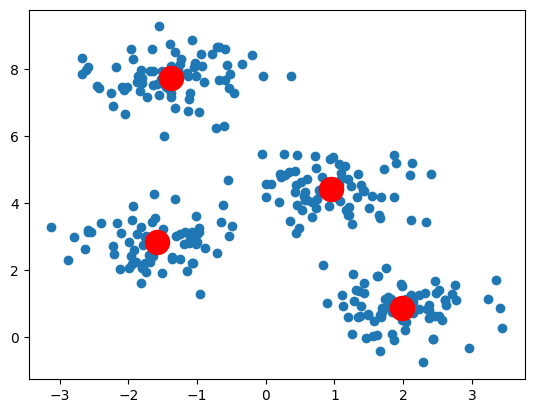

In [ ]:
#k means
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
#artificial neural networks
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X_train, y_train = make_circles(n_samples=700, noise=0.05)
X_test, y_test = make_circles(n_samples=300, noise=0.05)
sns.scatterplot([X_train[:,0], X_train[:,1], hue==y_train])
plt.title("Train Data")
plt.show()
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")
y_pred = clf.predict(X_test)
fig, ax =plt.subplots(1,2)
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_pred, ax=ax[0])
ax[1].title.set_text("Predicted Data")
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, ax=ax[1])
ax[0].title.set_text("Test Data")
plt.show()

NameError: name 'hue' is not defined

In [ ]:
#unification and resolution
!pip install pyswip

from pyswip import Prolog

# Initialize Prolog instance
prolog = Prolog()

# Define Prolog rules and facts
prolog.assertz("enjoy :- sunny, warm")
prolog.assertz("strawberry_picking :- warm, pleasant")
prolog.assertz("notstrawberry_picking :- raining")
prolog.assertz("wet :- raining")
prolog.assertz("warm")
prolog.assertz("raining")
prolog.assertz("sunny")

# Define a function to check and print Prolog goals
def check_goal(goal):
    result = list(prolog.query(goal))
    if result:
        print(f"{goal}: True")
    else:
        print(f"{goal}: False")

# Query the goals
check_goal("enjoy")  # Goal 2: You will enjoy
check_goal("strawberry_picking")  # Goal 1: Are you doing strawberry picking?
check_goal("wet")  # Goal 3: You will get wet


SwiPrologNotFoundError: SWI-Prolog not found

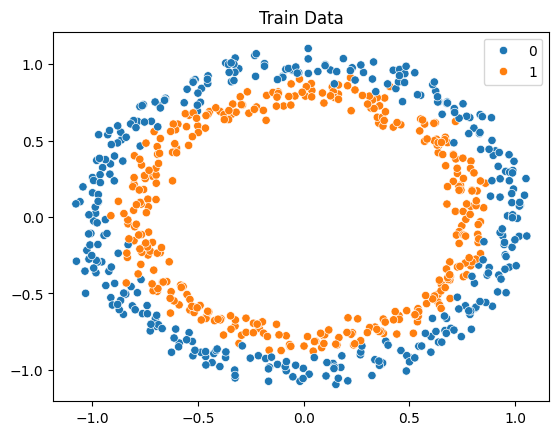

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score for Training Data = 0.9742857142857143
R2 Score for Test Data = 0.96


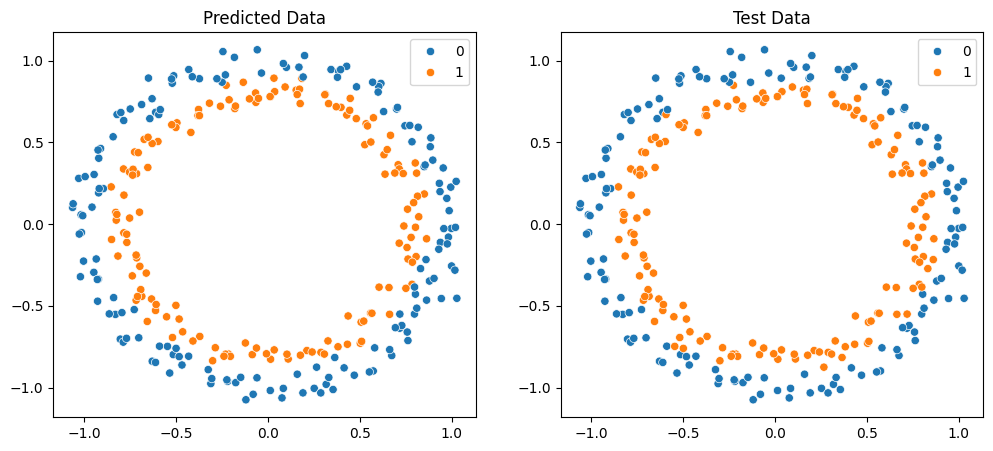

In [ ]:
#IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
#APPLICATION USING PYTHON - CLASSIFICATION

# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generating train and test data
X_train, y_train = make_circles(n_samples=700, noise=0.05)
X_test, y_test = make_circles(n_samples=300, noise=0.05)

# Plotting train data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title("Train Data")
plt.show()

# Training the classifier
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")

# Testing the classifier
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")
y_pred = clf.predict(X_test)

# Plotting predicted and test data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, ax=ax[0])
ax[0].title.set_text("Predicted Data")
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, ax=ax[1])
ax[1].title.set_text("Test Data")
plt.show()


In [ ]:
#IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
#APPLICATION USING PYTHON - REGRESSION

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X, y = make_regression(n_samples=1000, noise=0.05, n_features=100)

X.shape, y.shape = ((1000, 100), (1000,))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state
 =42)
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, y_train)
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")

R2 Score for Training Data = 0.9999862462945762
R2 Score for Test Data = 0.9710649924536682


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#DECISION TREE CLASSIFICATION

from google.colab import drive
drive.mount("/content/gdrive")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('/content/gdrive/My Drive/Social_Network_Ads.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

                                                                                                                                                   PAGE NUMBER:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()
 1, stop = X_set[:, 0].max() + 1, step =0.01), np.arange(start = X_set[:, 1].min()
 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), al
 pha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],c = ListedColormap(('red', 'green'))(i), label
=j)
  plt.title('Decision Tree Classification(Training set)')
  plt.xlabel('Age')
  plt.ylabel('Purchase')
  plt.legend()
plt.show()

In [ ]:
#IMPLEMENTATION OF DECISION TREE CLASSIFICATION TECHNIQUES

from sklearn import tree
#Using DecisionTree classifier for prediction
clf = tree.DecisionTreeClassifier()

#Here the array contains three values which are height,weight and shoe size
X = [[181, 80, 91], [182, 90, 92], [183, 100, 92], [184, 200, 93], [185, 300, 94], [186, 400, 95],
[187, 500, 96], [189, 600, 97], [190, 700, 98], [191, 800, 99], [192, 900, 100], [193, 1000, 101]]
Y = ['male', 'male', 'female', 'male' , 'female', 'male', 'female' , 'male' , 'female', 'male' , 'female' ,
'male' ]
clf = clf.fit(X, Y)

#Predicting on basis of given random values for each given feature
predictionf = clf.predict([[181, 80, 91]])
predictionm = clf.predict([[183, 100, 92]])

#Printing final prediction
print(predictionf)
print(predictionm)

['male']
['female']


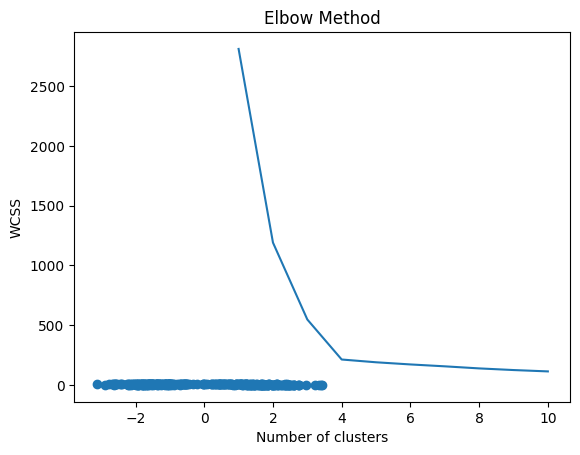

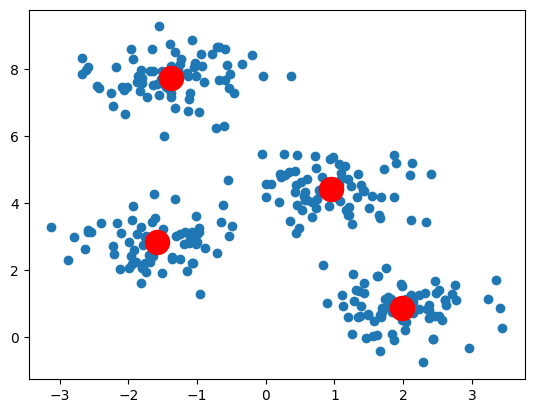

In [ ]:
#IMPLEMENTATION OF CLUSTERING TECHNIQUES  K - MEANS

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()